In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib
from statsmodels.tsa.stattools import adfuller
import datetime
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.dates as mdates
import statsmodels as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
from prophet import Prophet

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
mensual = pd.read_csv('mensual_ext.csv')
mensual['pickup_datetime'] = pd.to_datetime(mensual['pickup_datetime'])
mensual.set_index('pickup_datetime', inplace=True)

# Mensuales

In [5]:
mensual

,passenger_count,trip_distance,total_amount,duration,n_trips
pickup_datetime,,,,,
2022-03-31,4270445,5654635.96,46130518.27,3.426591e+07,3075023
2022-04-30,4228947,5631284.80,45576361.41,3.418014e+07,3004149
2022-05-31,4069075,5489703.55,44850317.06,3.410236e+07,2926385
2022-06-30,4062172,5459604.00,44781679.81,3.402593e+07,2917367
2022-07-31,3724235,4982858.94,39702293.79,2.932747e+07,2627194
2022-08-31,3669188,4896650.61,39217964.21,2.909971e+07,2600258
2022-09-30,3522192,4713024.55,39442410.03,3.048464e+07,2552011
2022-10-31,4102538,5466063.56,45936698.79,3.558027e+07,2975223
2022-11-30,3650821,4779731.95,40597166.88,3.146803e+07,2639133


In [6]:
mensual_p = mensual['n_trips']

In [7]:
mensual_p

,n_trips
pickup_datetime,
2022-03-31,3075023
2022-04-30,3004149
2022-05-31,2926385
2022-06-30,2917367
2022-07-31,2627194
2022-08-31,2600258
2022-09-30,2552011
2022-10-31,2975223
2022-11-30,2639133


In [8]:
mensual_p = mensual_p.reset_index()

In [9]:
mensual_p.rename(columns= {'pickup_datetime': 'ds', 'n_trips' : 'y'}, inplace = True)
mensual_p

,ds,y
0,2022-03-31,3075023
1,2022-04-30,3004149
2,2022-05-31,2926385
3,2022-06-30,2917367
4,2022-07-31,2627194
5,2022-08-31,2600258
6,2022-09-30,2552011
7,2022-10-31,2975223
8,2022-11-30,2639133
9,2022-12-31,2729661


## Modelo

In [228]:
# Instanciamos un modelo de Prophet

prophet_1 = Prophet(yearly_seasonality= True, uncertainty_samples = 1000, mcmc_samples=100, interval_width= 0.7, seasonality_prior_scale=5,changepoint_prior_scale =0.04)

# Entrenamos el modelo
prophet_1.fit(mensual_p)

# Construimos un dataframe con los x valores futuros que querámos predecir. 12 meses.
build_forecast = prophet_1.make_future_dataframe(periods=12, freq='M') #

# Predecimos
forecast_1 = prophet_1.predict(build_forecast)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmplnvzjdhf/2dm1brqx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplnvzjdhf/vdsapytd.json
00:59:36 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=55686', 'data', 'file=/tmp/tmplnvzjdhf/2dm1brqx.json', 'init=/tmp/tmplnvzjdhf/vdsapytd.json', 'output', 'file=/tmp/tmplnvzjdhf/prophet_modelq9dlocaj/prophet_model-20241119005937_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=55686', 'data', 'file=/tmp/tmplnvzjdhf/2dm1brqx.json', 'init=/tmp/tmplnvzjdhf/vdsapytd.json', 'output', 'file=/tmp/tmplnvzjdhf/prophet_modelq9dlocaj/prophet_model-20241119005937_2.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanp

00:59:39 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=55686', 'data', 'file=/tmp/tmplnvzjdhf/2dm1brqx.json', 'init=/tmp/tmplnvzjdhf/vdsapytd.json', 'output', 'file=/tmp/tmplnvzjdhf/prophet_modelq9dlocaj/prophet_model-20241119005937_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmplnvzjdhf/prophet_modelq9dlocaj/prophet_model-20241119005937_1.csv
 console_msgs (if any):
	/tmp/tmplnvzjdhf/prophet_modelq9dlocaj/prophet_model-20241119005937_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 50
    num_warmup = 50
    save_warmup = 0 (Default)
    thin = 1 (Default)


In [229]:
forecast_1

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-03-31,2.823474e+06,2.963174e+06,3.181919e+06,2.759177e+06,2.891194e+06,251667.689887,180784.974047,318979.020859,251667.689887,180784.974047,318979.020859,0.0,0.0,0.0,3.075142e+06
1,2022-04-30,2.806706e+06,2.867621e+06,3.081550e+06,2.746330e+06,2.860942e+06,166812.214131,98613.594959,243391.818926,166812.214131,98613.594959,243391.818926,0.0,0.0,0.0,2.973518e+06
2,2022-05-31,2.790346e+06,2.939187e+06,3.136379e+06,2.734443e+06,2.841342e+06,244636.266564,182770.821089,303258.582274,244636.266564,182770.821089,303258.582274,0.0,0.0,0.0,3.034982e+06
3,2022-06-30,2.774402e+06,2.813152e+06,3.023468e+06,2.722893e+06,2.820842e+06,143211.897322,86570.720672,208168.703179,143211.897322,86570.720672,208168.703179,0.0,0.0,0.0,2.917614e+06
4,2022-07-31,2.758045e+06,2.498560e+06,2.700467e+06,2.712472e+06,2.805155e+06,-170964.675744,-226038.318594,-118686.016927,-170964.675744,-226038.318594,-118686.016927,0.0,0.0,0.0,2.587080e+06
5,2022-08-31,2.740908e+06,2.422289e+06,2.620191e+06,2.693641e+06,2.786372e+06,-219243.973041,-278139.136798,-158148.080919,-219243.973041,-278139.136798,-158148.080919,0.0,0.0,0.0,2.521664e+06
6,2022-09-30,2.722835e+06,2.414082e+06,2.644214e+06,2.676613e+06,2.773586e+06,-195240.989238,-269239.721799,-127209.067303,-195240.989238,-269239.721799,-127209.067303,0.0,0.0,0.0,2.527594e+06
7,2022-10-31,2.703358e+06,2.838312e+06,3.073477e+06,2.657076e+06,2.753795e+06,255992.877834,159344.008050,343478.030093,255992.877834,159344.008050,343478.030093,0.0,0.0,0.0,2.959351e+06
8,2022-11-30,2.684240e+06,2.516489e+06,2.727574e+06,2.633123e+06,2.735947e+06,-61014.586564,-127746.694249,3750.940426,-61014.586564,-127746.694249,3750.940426,0.0,0.0,0.0,2.623226e+06
9,2022-12-31,2.664022e+06,2.612444e+06,2.837792e+06,2.607828e+06,2.715696e+06,55531.515091,-18691.684548,131228.733086,55531.515091,-18691.684548,131228.733086,0.0,0.0,0.0,2.719554e+06


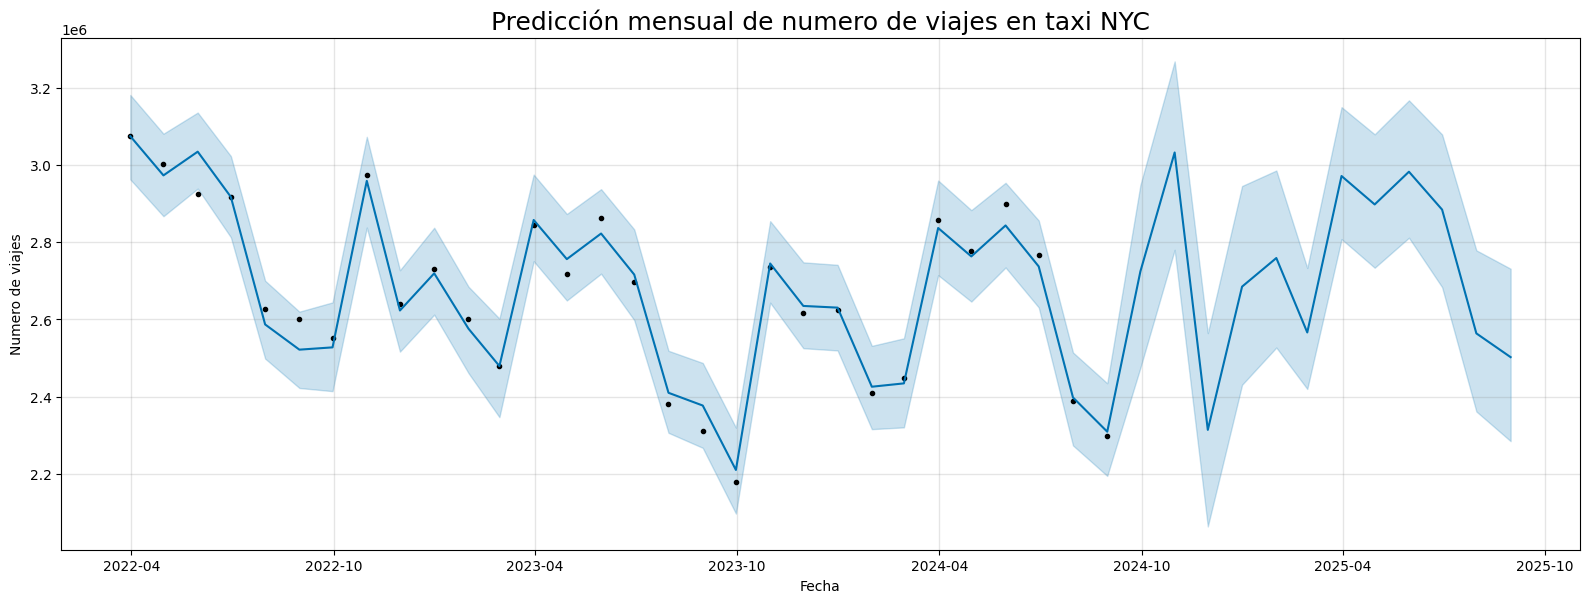

In [230]:
# plot forecasts

prophet_1.plot(forecast_1, xlabel='Fecha', ylabel='Numero de viajes', figsize = (16,6))
plt.title('Predicción mensual de numero de viajes en taxi NYC', fontsize = 18)
plt.show()

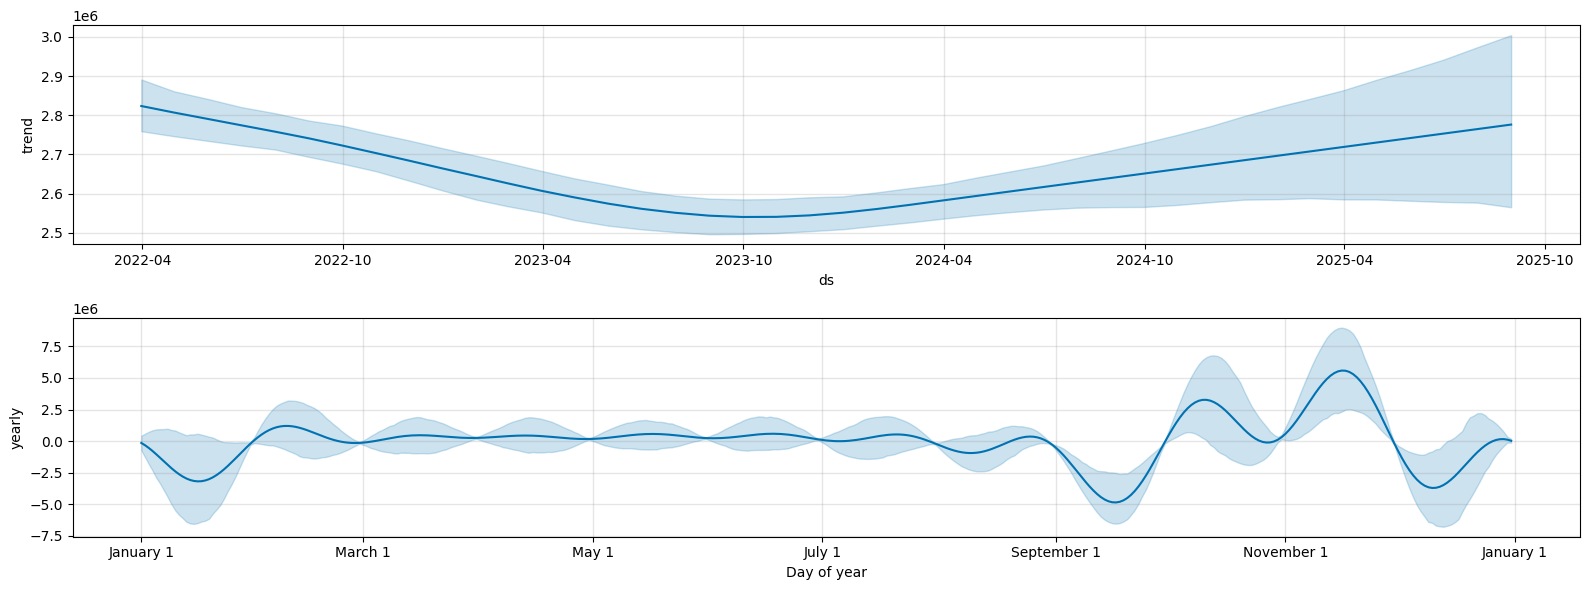

In [231]:
# Ploteamos los componentes de nuestra serie de tiempo

components = prophet_1.plot_components(forecast_1, figsize=(16,6))

## Evaluacion

In [232]:
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric

In [233]:
df_cv_1 = cross_validation(prophet_1, initial = '365 days', horizon = '365 days')

INFO:prophet:Making 1 forecasts with cutoffs between 2023-09-01 00:00:00 and 2023-09-01 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmplnvzjdhf/h5ktrkm4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplnvzjdhf/qcnkp_bm.json
00:59:40 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=94502', 'data', 'file=/tmp/tmplnvzjdhf/h5ktrkm4.json', 'init=/tmp/tmplnvzjdhf/qcnkp_bm.json', 'output', 'file=/tmp/tmplnvzjdhf/prophet_model5_07682t/prophet_model-20241119005940_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=94502', 'data', 'file=/tmp/tmplnvzjdhf/h5ktrkm4.json', 'init=/tmp/tmplnvzjdhf/qcnkp_bm.json', 'output', 'file=/tmp/tmplnvzjdhf/prophet_model5_07682t/prophet_model-20241119005940_2.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanp

00:59:43 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=94502', 'data', 'file=/tmp/tmplnvzjdhf/h5ktrkm4.json', 'init=/tmp/tmplnvzjdhf/qcnkp_bm.json', 'output', 'file=/tmp/tmplnvzjdhf/prophet_model5_07682t/prophet_model-20241119005940_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmplnvzjdhf/prophet_model5_07682t/prophet_model-20241119005940_1.csv
 console_msgs (if any):
	/tmp/tmplnvzjdhf/prophet_model5_07682t/prophet_model-20241119005940_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 50
    num_warmup = 50
    save_warmup = 0 (Default)
    thin = 1 (Default)


In [234]:
df_cv_1


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2023-09-30,2.727377e+06,1.741654e+06,3.861133e+06,2179200,2023-09-01
1,2023-10-31,2.302064e+06,1.140055e+06,3.708550e+06,2736389,2023-09-01
2,2023-11-30,2.565699e+06,1.282087e+06,3.672207e+06,2616757,2023-09-01
3,2023-12-31,2.590414e+06,1.309654e+06,4.059644e+06,2625768,2023-09-01
4,2024-01-31,2.503052e+06,1.372193e+06,3.702098e+06,2409342,2023-09-01
5,2024-02-29,2.914838e+06,-7.205200e+05,5.507522e+06,2448952,2023-09-01
6,2024-03-31,2.317051e+06,8.078688e+05,3.493287e+06,2858661,2023-09-01
7,2024-04-30,2.745754e+06,1.783152e+06,3.696070e+06,2777362,2023-09-01
8,2024-05-31,2.316531e+06,1.220190e+06,3.439612e+06,2899539,2023-09-01
9,2024-06-30,2.643545e+06,1.548782e+06,3.763833e+06,2767032,2023-09-01


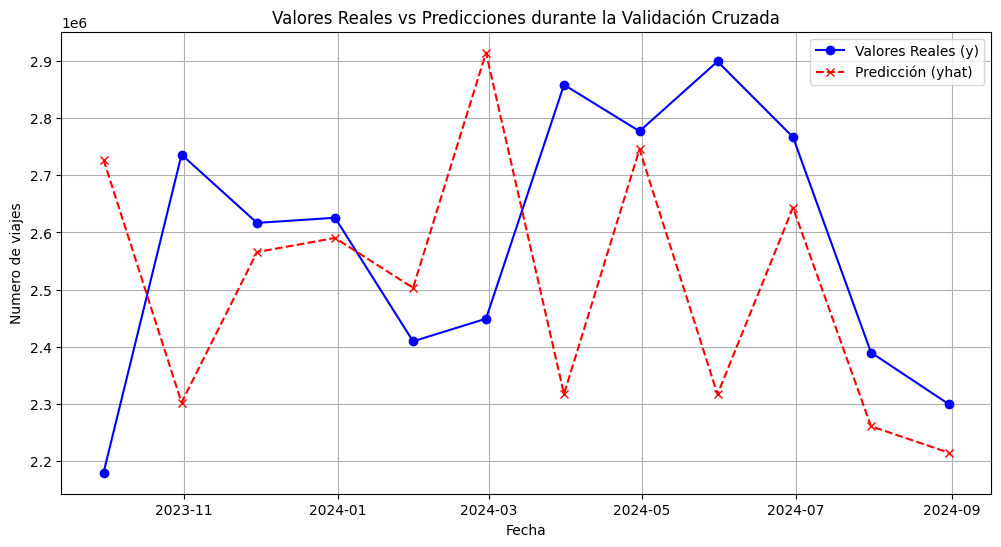

In [235]:
plt.figure(figsize=(12, 6))

plt.plot(df_cv_1['ds'], df_cv_1['y'], label='Valores Reales (y)', color='blue', marker='o')
plt.plot(df_cv_1['ds'], df_cv_1['yhat'], label='Predicción (yhat)', color='red', linestyle='--', marker='x')

plt.xlabel('Fecha')
plt.ylabel('Numero de viajes')
plt.title('Valores Reales vs Predicciones durante la Validación Cruzada')
plt.legend()
plt.grid(True)
plt.show()


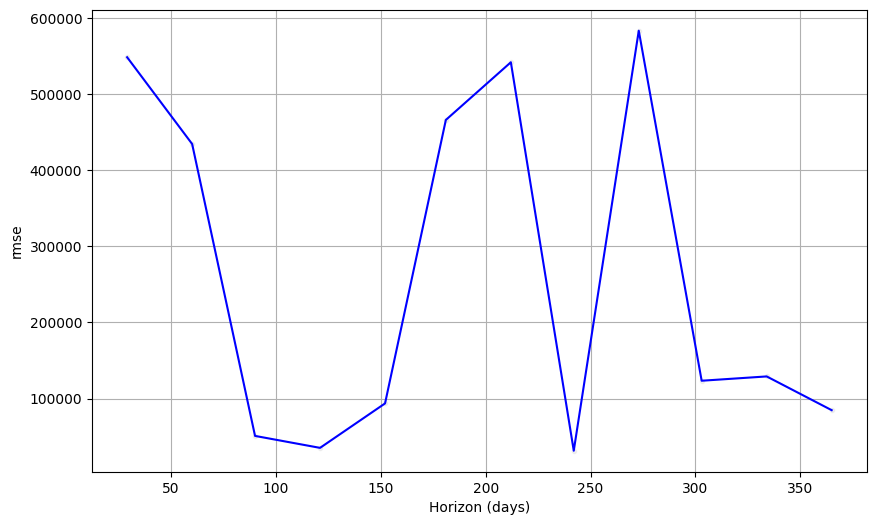

In [236]:
fig = plot_cross_validation_metric(df_cv_1, metric='rmse')

In [237]:
df_p_1 = performance_metrics(df_cv_1)

In [238]:
print('El RMSE es:', df_p_1.rmse.mean())

El RMSE es: 260184.19295097378


In [239]:
print('El MAE es:', df_p_1.mae.mean())

El MAE es: 260184.19295097378


In [240]:
print('La cobertura es:', df_p_1.coverage.mean())

La cobertura es: 1.0


In [241]:
print('La MAPE es:', df_p_1.mape.mean())

La MAPE es: 0.10082225326429282


In [242]:
df_p_1.describe()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
count,12,1.200000e+01,12.000000,12.000000,12.000000,12.000000,12.000000,12.0
mean,196 days 20:00:00,1.160156e+11,260184.192951,260184.192951,0.100822,0.100822,0.102003,1.0
std,109 days 20:33:46.987269072,1.393840e+11,229592.118250,229592.118250,0.089179,0.089179,0.089181,0.0
min,29 days 00:00:00,9.990459e+08,31607.687740,31607.687740,0.011380,0.011380,0.011446,1.0
25%,113 days 06:00:00,6.050780e+09,76398.508923,76398.508923,0.032557,0.032557,0.033125,1.0
50%,196 days 12:00:00,1.596356e+10,126315.310922,126315.310922,0.049334,0.049334,0.050594,1.0
75%,280 days 12:00:00,2.361226e+11,484816.959811,484816.959811,0.189657,0.189657,0.182609,1.0
max,365 days 00:00:00,3.398978e+11,583007.522094,583007.522094,0.251550,0.251550,0.223543,1.0


In [243]:
df_p = performance_metrics(df_cv_1, rolling_window = 1)
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,365 days,1.160156e+11,340610.69169,260184.192951,0.100822,0.049334,0.102003,1.0


In [244]:
#forecast_1.to_csv('forecast_mensual.csv')